## 一、使用matplotlib进行绘图

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
np.random.seed(12345)
%matplotlib inline

### 1. 基本绘图方法

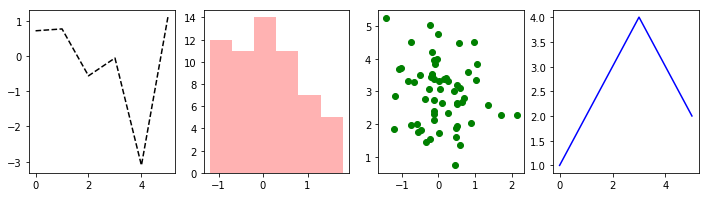

In [27]:
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)
plt.plot([1, 2, 3, 4, 3, 2], 'b-')
ax1.plot(np.random.randn(6), 'k--')
ax2.hist(np.random.randn(60), bins=6, color='r', alpha=0.3)
ax3.scatter(np.random.randn(60), np.random.randn(60) + 3, color='g')

#### 另一种方式

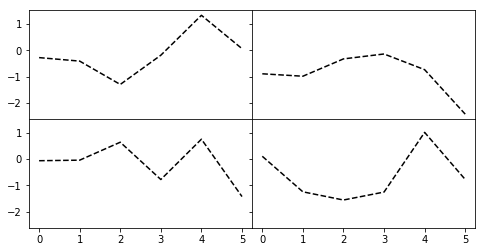

In [31]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 4))
for i in range(2):
    for j in range(2):
        axes[i, j].plot(np.random.randn(6), 'k--')
plt.subplots_adjust(wspace=0, hspace=0) #调整边距

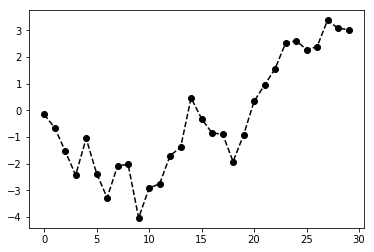

In [37]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')
#plt.plot(np.random.randn(60).cumsum(), color='k', linestyle='dashed', marker='o')

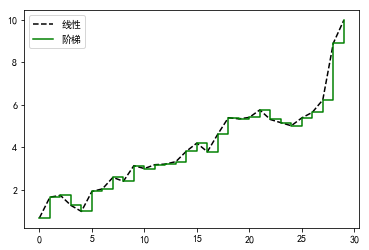

In [60]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = 'SimHei, ' #支持中文
matplotlib.rcParams['axes.unicode_minus'] = False

data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='线性')
plt.plot(data, 'g-', label='阶梯', drawstyle='steps-post')
plt.legend(loc='best')

In [59]:
print(matplotlib.get_configdir())
matplotlib.font_manager.FontProperties().get_family()

/Users/wisesoe/.matplotlib


['sans-serif']

绘制更多图形

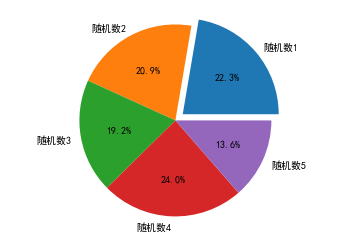

In [180]:
data = np.random.randint(10, 100, 5)
plt.pie(data, 
        explode=[0.1, 0, 0, 0, 0], 
        labels=['随机数1', '随机数2', '随机数3', '随机数4', '随机数5'],
        autopct='%1.1f%%',
        startangle=0)
plt.axis('equal')
plt.show()

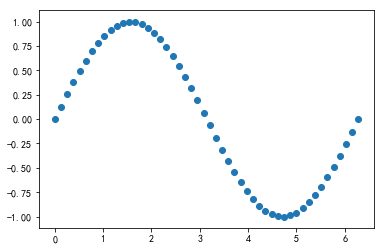

In [197]:
x = np.linspace(0, 2 * np.pi, 50)
y = np.sin(x)
plt.scatter(x, y)

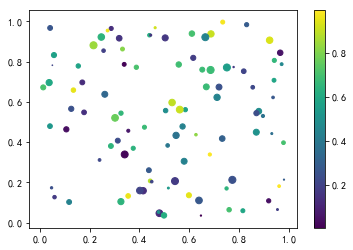

In [198]:
x = np.random.rand(100)
y = np.random.rand(100)
size = np.random.rand(100) * 50
color = np.random.rand(100)
plt.scatter(x, y, size, color)
plt.colorbar()

### 2. 设置标题、刻度、标签和图例

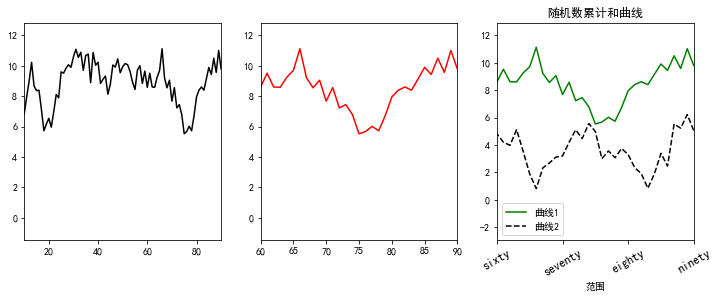

In [96]:
data = np.random.randn(100).cumsum()
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.plot(data, 'k-')
ax2.plot(data, 'r-')
ax3.plot(data, 'g-', label='曲线1')

ax1.set_xlim([10, 90])  
ax2.set_xlim([60, 90]) #限制x轴显示范围，类似放大效果
ax3.set_xlim([60, 90])
ax3.set_xticks([60, 70, 80, 90])
ax3.set_xticklabels(['sixty', 'seventy', 'eighty', 'ninety'], fontsize='large', rotation=30)
ax3.set_title('随机数累计和曲线')
ax3.set_xlabel('范围')

ax3.plot(np.random.randn(100).cumsum(), 'k--', label='曲线2') 
ax3.legend(loc='best') #显示图例

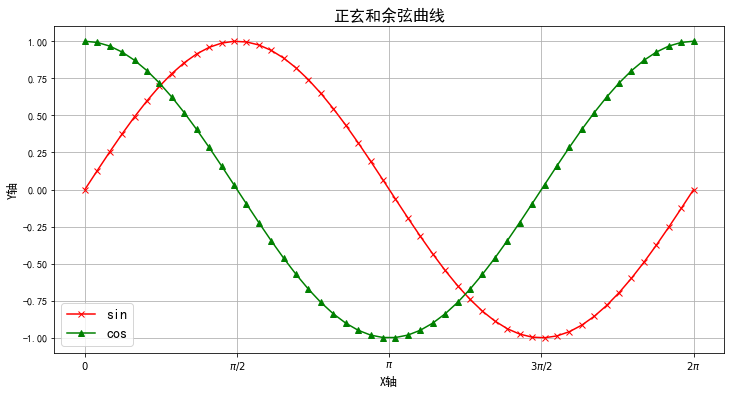

In [201]:
x = np.linspace(start=0, stop=2*np.pi, num=50) 
y1 = np.sin(x)
y2 = np.cos(x)
fig,ax=plt.subplots(1,figsize=(12,6))
ax.plot(x, y1, 'r-x', label='sin',)
ax.plot(x, y2, 'g-^', label='cos',)
ax.legend(fontsize=14)
ax.title.set_text("正玄和余弦曲线") 
ax.title.set_fontsize(16)
ax.set_xlabel("X轴", fontdict={"size":12}) 
ax.set_ylabel("Y轴", fontdict={"size":12})
ax.set_xticks([0, np.pi / 2, np.pi, np.pi * 3 / 2, 2* np.pi])
ax.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
ax.grid(True)

### 3. 设置注解

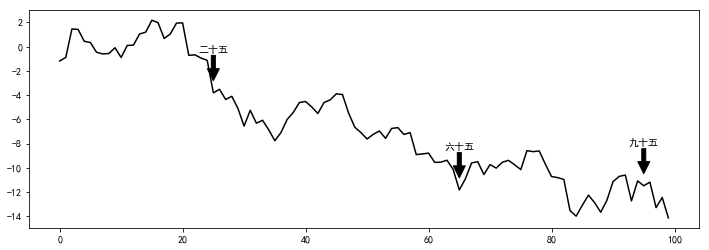

In [118]:
from pandas import Series, DataFrame
data = Series(np.random.randn(100).cumsum())
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data, 'k-')
custom_labels = [(25, '二十五'), (65, '六十五'), (95, '九十五')]
for index, label in custom_labels:
    ax.annotate(label, xy=(index, data.asof(index) + 1), 
                xytext=(index, data.asof(index) + 4), 
                arrowprops=dict(facecolor='black'),
                horizontalalignment='center',
                verticalalignment='top')

## 二、使用pandas进行绘图
pandas对matplotlib进行了有效的封装，使得绘图变得容易

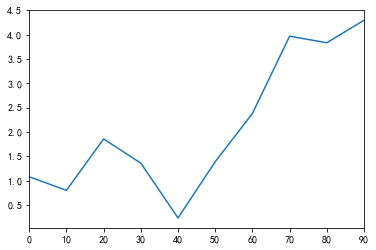

In [119]:
from pandas import Series, DataFrame
data = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
data.plot()

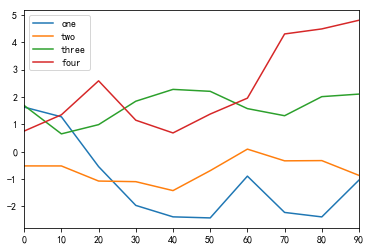

In [121]:
df = DataFrame(np.random.randn(10, 4).cumsum(0), 
               columns=['one', 'two', 'three', 'four'],
               index=np.arange(0, 100 ,10))   #每一列画一条曲线
df.plot()

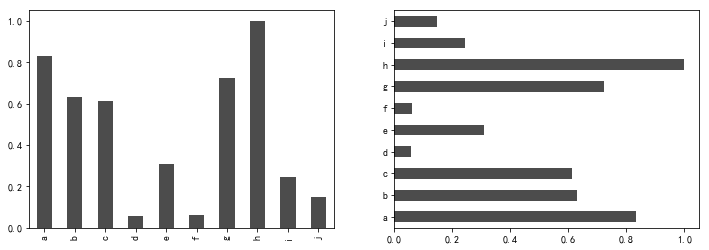

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
data = Series(np.random.rand(10), index=list('abcdefghij'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

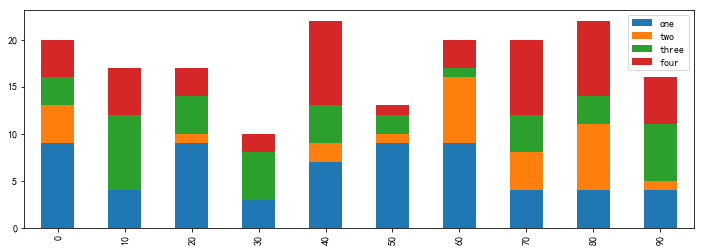

In [137]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1 ,1, 1)
df = DataFrame(np.random.randint(0, 10, size=(10, 4)), 
               columns=['one', 'two', 'three', 'four'],
               index=np.arange(0, 100 ,10)) 
df.plot(kind='bar', ax = ax, stacked=True)

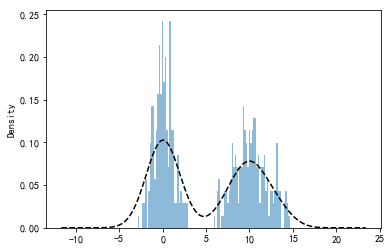

In [155]:
d1 = np.random.normal(0, 1, size=200)
d2 = np.random.normal(10, 2, size=200)
data = Series(np.concatenate([d1, d2]))
data.hist(bins=100, alpha=0.5, normed=True)
data.plot(kind='kde', style='k--') #密度图

## 三、绘图实例
以下实例搜集自互联网

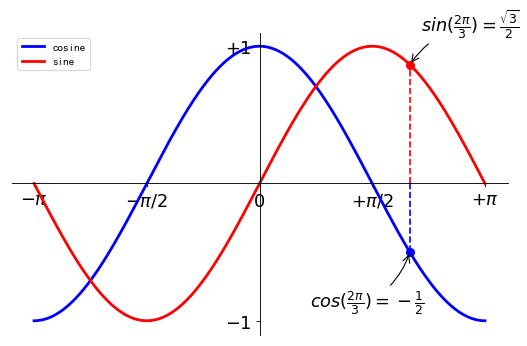

In [194]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), dpi=80)
plt.subplot(111)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine")

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.yticks([-1, 1],
          [r'$-1$', r'$+1$'])

plt.legend(loc='upper left')

t = 2*np.pi/3
plt.plot([t, t], [0, np.cos(t)],
        color='blue', linewidth=1.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')
plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
            xy=(t, np.sin(t)), xycoords='data',
            xytext=(10, 30), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t], [0, np.sin(t)],
        color='red', linewidth=1.5, linestyle="--")
plt.scatter([t, ], [np.sin(t), ], 50, color ='red')
plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$', xy=(t, np.cos(t)),
            xycoords='data', xytext=(-90, -50),
            textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))

plt.show()

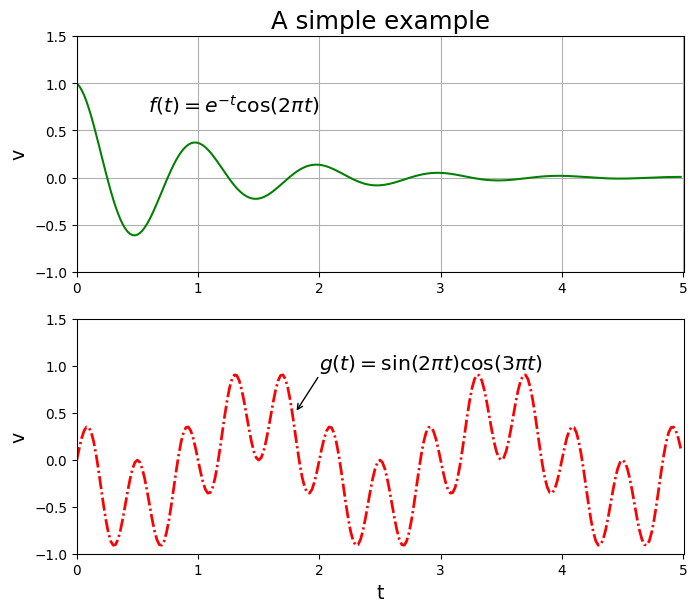

In [2]:
def f1(t):
    return np.exp(-t)*np.cos(2*np.pi*t)

def f2(t):
    return np.sin(2*np.pi*t)*np.cos(3*np.pi*t)

t = np.arange(0.0,5.0,0.02)

plt.figure(figsize=(8,7),dpi=98)
p1 = plt.subplot(211)
p2 = plt.subplot(212)

label_f1 = "$f(t)=e^{-t} \cos (2 \pi t)$"
label_f2 = "$g(t)=\sin (2 \pi t) \cos (3 \pi t)$"

p1.plot(t,f1(t),"g-",label=label_f1)
p2.plot(t,f2(t),"r-.",label=label_f2,linewidth=2)

p1.axis([0.0,5.01,-1.0,1.5])

p1.set_ylabel("v",fontsize=14)
p1.set_title("A simple example",fontsize=18)
p1.grid(True)
#p1.legend()

tx = 2
ty = 0.9
p1.text(tx,ty,label_f1,fontsize=15,verticalalignment="top",horizontalalignment="right")

p2.axis([0.0,5.01,-1.0,1.5])
p2.set_ylabel("v",fontsize=14)
p2.set_xlabel("t",fontsize=14)
#p2.legend()
tx = 2
ty = 0.9
p2.text(tx,ty,label_f2,fontsize=15,verticalalignment="bottom",horizontalalignment="left")

p2.annotate('',xy=(1.8,0.5),xytext=(tx,ty),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

plt.show()

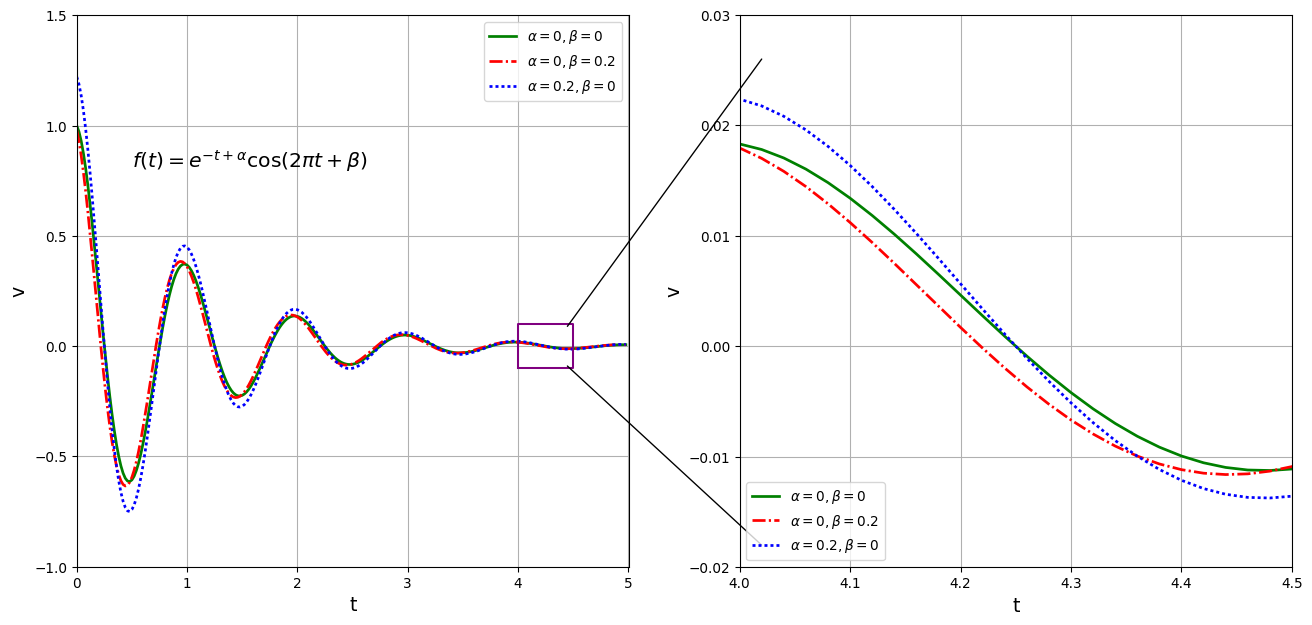

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

def f1(t):
    return np.exp(-t)*np.cos(2*np.pi*t)

def f11(t):
    return np.exp(-t)*np.cos(2*np.pi*t+0.2)

def f111(t):
    return np.exp(-t+0.2)*np.cos(2*np.pi*t)

t = np.arange(0.0,5.0,0.02)

plt.figure(figsize=(16,8),dpi=98)
p1 = plt.subplot(121,aspect=5/2.5)
p2 = plt.subplot(122,aspect=0.5/0.05)

label_f0 = r"$f(t)=e^{-t+\alpha} \cos (2 \pi t+\beta)$"
label_f1 = r"$\alpha=0,\beta=0$"
label_f11 = r"$\alpha=0,\beta=0.2$"
label_f111 = r"$\alpha=0.2,\beta=0$"

p1.plot(t,f1(t),"g",label=label_f1,linewidth=2)
p1.plot(t,f11(t),"r-.",label=label_f11,linewidth=2)
p1.plot(t,f111(t),"b:",label=label_f111,linewidth=2)
p2.plot(t,f1(t),"g",label=label_f1,linewidth=2)
p2.plot(t,f11(t),"r-.",label=label_f11,linewidth=2)
p2.plot(t,f111(t),"b:",label=label_f111,linewidth=2)

p1.axis([0.0,5.01,-1.0,1.5])

p1.set_ylabel("v",fontsize=14)
p1.set_xlabel("t",fontsize=14)
#p1.set_title("A simple example",fontsize=18)
p1.grid(True)
p1.legend()

tx = 0.5
ty = 0.9
p1.text(tx,ty,label_f0,fontsize=15,verticalalignment="top",horizontalalignment="left")

p2.axis([4,4.5,-0.02,0.03])
p2.set_ylabel("v",fontsize=14)
p2.set_xlabel("t",fontsize=14)
p2.grid(True)
p2.legend()

# plot the box
tx0 = 4
tx1 = 4.5
ty0 = -0.1
ty1 = 0.1
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
p1.plot(sx,sy,"purple")

# plot patch lines
xy=(4.45,0.09)
xy2 = (4.02,0.026)
con = ConnectionPatch(xyA=xy2,xyB=xy,coordsA="data",coordsB="data",
        axesA=p2,axesB=p1)
p2.add_artist(con)

xy = (4.45,-0.09)
xy2 = (4.02,-0.018)
con = ConnectionPatch(xyA=xy2,xyB=xy,coordsA="data",coordsB="data",
        axesA=p2,axesB=p1)
p2.add_artist(con)

plt.show()